# Part I: Convolutional Neural Networks

**Importing libraries**

In [0]:
## Importing packages and libraries:

import numpy as np
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
import scipy
from scipy import stats
from scipy import linalg
from scipy.linalg import eigh
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
import glob
import os
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import keras.models
from keras.models import Sequential
import tensorflow as tf
import time as time
from tensorflow.python.keras.callbacks import TensorBoard
import statistics 
from keras import Model
from keras import models

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
PATH = '/content/drive/My Drive/Data/'
conc_0 = pd.read_csv(PATH+'0ppm_combined.csv', delimiter='\t', header=None, skiprows = 1)
conc_7 = pd.read_csv(PATH+'7ppm.csv', delimiter=',', header=None)
conc_9 = pd.read_csv(PATH+'9ppm_combined.csv', delimiter='\t', header=None, skiprows = 1)
conc_14 = pd.read_csv(PATH+'14ppm_combined.csv', delimiter='\t', header=None, skiprows = 1)
conc_16 = pd.read_csv(PATH+'16ppm_combined.csv', delimiter='\t', header=None, skiprows = 1)

conc_0_mean = pd.DataFrame(data=conc_0.mean(axis = 1))
conc_9_mean = pd.DataFrame(data=conc_9.mean(axis = 1))
conc_14_mean = pd.DataFrame(data=conc_14.mean(axis = 1))
conc_16_mean = pd.DataFrame(data=conc_16.mean(axis = 1))

del conc_0[0]
del conc_9[0]
del conc_14[0]
del conc_16[0]

print('size of conc_0 = ', conc_0.shape)
print('size of conc_7 = ', conc_7.shape)
print('size of conc_9 = ', conc_9.shape)
print('size of conc_14 = ', conc_14.shape)
print('size of conc_16 = ', conc_16.shape)
print('')
print('size of conc_0 mean = ', conc_0_mean.shape)
print('size of conc_9 mean = ', conc_9_mean.shape)
print('size of conc_14 mean = ', conc_14_mean.shape)
print('size of conc_16 mean = ', conc_16_mean.shape)

size of conc_0 =  (1024, 254)
size of conc_7 =  (1024, 40)
size of conc_9 =  (1024, 232)
size of conc_14 =  (1024, 270)
size of conc_16 =  (1024, 261)

size of conc_0 mean =  (1024, 1)
size of conc_9 mean =  (1024, 1)
size of conc_14 mean =  (1024, 1)
size of conc_16 mean =  (1024, 1)


Text(0.3, 0.6, 'Ar I (772.3nm)')

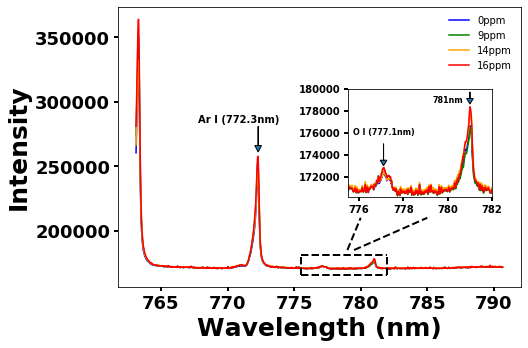

In [0]:
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
from pylab import figure, text, scatter, show

PATH = '/content/drive/My Drive/Data/'
wavelength = pd.read_csv(PATH+'wavelength_oxygen.csv', delimiter='\t', header=None)
fig,ax = plt.subplots(figsize = (8,6))
fig.subplots_adjust(left = 0.2,top=0.9, bottom=0.25,hspace = 0.5, wspace=0.5)

color_dic = {0: 'blue', 1: 'green', 2: 'orange', 3:'red'}
label_dic = {0:'0ppm',1:'9ppm',2:'14ppm',3:'16ppm'}

plt.plot(wavelength, conc_0_mean[0],  c='blue',label = '0ppm')
plt.plot(wavelength, conc_9_mean[0],  color='green',label = '9ppm')
plt.plot(wavelength, conc_14_mean[0],  color='orange',label = '14ppm')
plt.plot(wavelength, conc_16_mean[0],  color='red',label = '16ppm')
ax.legend(frameon=False)
plt.xlabel('Wavelength (nm)',fontsize=25,fontweight="bold")
plt.ylabel('Intensity',fontsize=25,fontweight="bold")
#plt.title('14ppm',fontsize=30)
plt.tick_params(which='both', length=4, width=2, labelsize=18,colors='black')
plt.setp(ax.get_xticklabels(), fontweight="bold")
plt.setp(ax.get_yticklabels(), fontweight="bold")

plt.plot([775.5, 775.5], [166000, 181000], '--', lw=2,color='black')
plt.plot([782, 782], [166000, 181000], '--', lw=2,color='black')
plt.plot([775.5, 782], [166000, 166000], '--', lw=2,color='black')
plt.plot([775.5, 782], [181000, 181000], '--', lw=2,color='black')

plt.plot([779, 780], [185000, 210000], '--', lw=2,color='black')
plt.plot([779.5, 785], [185000, 210000], '--', lw=2,color='black')


left, bottom, width, height = [0.6, 0.46, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(wavelength, conc_0_mean[0],  c='blue',label = '0ppm')
ax2.plot(wavelength, conc_9_mean[0],  color='green',label = '9ppm')
ax2.plot(wavelength, conc_14_mean[0],  color='orange',label = '14ppm')
ax2.plot(wavelength, conc_16_mean[0],  color='red',label = '16ppm')
ax2.set_xlim(775.5,782)
ax2.set_ylim(170200,180000)
ax2.tick_params(which='both', length=4, width=2, labelsize=10,colors='black')
plt.setp(ax2.get_xticklabels(), fontweight="bold")
plt.setp(ax2.get_yticklabels(), fontweight="bold")
ax2.arrow(777.1, 175000, 0, -2000,length_includes_head=True,head_width=0.3, head_length=500)
ax2.arrow(781, 179700,0,-1100, length_includes_head=True,head_width=0.3, head_length=500)
ax.arrow(772.3, 281000, 0, -20000, length_includes_head=True,head_width=0.5, head_length=5000)
text(0.25, 0.6,'O I (777.1nm)',fontweight="bold",fontsize=8, ha='center', va='center', transform=ax2.transAxes)
text(0.69, 0.90,'781nm',fontweight="bold",fontsize=8, ha='center', va='center', transform=ax2.transAxes)
text(0.30, 0.6,'Ar I (772.3nm)',fontweight="bold",fontsize=10, ha='center', va='center', transform=ax.transAxes)

# ax.set_xlim(774,780)
# ax.set_ylim(170000,174000)

# plt.savefig(PATH+"Graphs/"+"Mean_spectra.png",format='png', dpi=1200)

size of conc_0 =  (1024, 254)
size of conc_7 =  (1024, 40)
size of conc_9 =  (1024, 232)
size of conc_14 =  (1024, 270)
size of conc_16 =  (1024, 261)

size of conc_0_mean =  (1024, 1)
size of conc_9_mean =  (1024, 1)
size of conc_14_mean =  (1024, 1)
size of conc_16_mean =  (1024, 1)


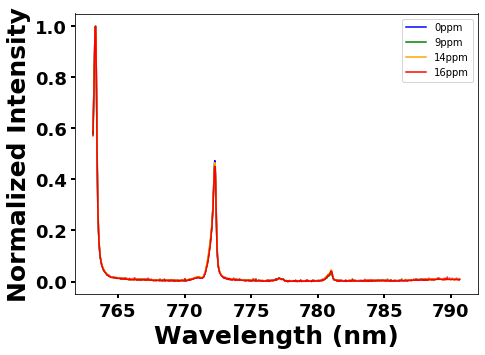

In [0]:
from sklearn.preprocessing import MinMaxScaler
min_max_sclaer = MinMaxScaler()
conc_0_scaled = pd.DataFrame(data = min_max_sclaer.fit_transform(conc_0))
conc_7_scaled = pd.DataFrame(data = min_max_sclaer.fit_transform(conc_7))
conc_9_scaled = pd.DataFrame(data = min_max_sclaer.fit_transform(conc_9))
conc_14_scaled = pd.DataFrame(data = min_max_sclaer.fit_transform(conc_14))
conc_16_scaled = pd.DataFrame(data = min_max_sclaer.fit_transform(conc_16))

conc_0_mean_scaled = pd.DataFrame(data = min_max_sclaer.fit_transform(conc_0_mean))
conc_9_mean_scaled = pd.DataFrame(data = min_max_sclaer.fit_transform(conc_9_mean))
conc_14_mean_scaled = pd.DataFrame(data = min_max_sclaer.fit_transform(conc_14_mean))
conc_16_mean_scaled = pd.DataFrame(data = min_max_sclaer.fit_transform(conc_16_mean))

print('size of conc_0 = ', conc_0_scaled.shape)
print('size of conc_7 = ', conc_7_scaled.shape)
print('size of conc_9 = ', conc_9_scaled.shape)
print('size of conc_14 = ', conc_14_scaled.shape)
print('size of conc_16 = ', conc_16_scaled.shape)

print('')
print('size of conc_0_mean = ', conc_0_mean_scaled.shape)
print('size of conc_9_mean = ', conc_9_mean_scaled.shape)
print('size of conc_14_mean = ', conc_14_mean_scaled.shape)
print('size of conc_16_mean = ', conc_16_mean_scaled.shape)

fig,ax = plt.subplots(figsize = (8,6))
fig.subplots_adjust(left = 0.2,top=0.9, bottom=0.25,hspace = 0.5, wspace=0.5)



color_dic = {0: 'blue', 1: 'green', 2: 'orange', 3:'red'}
label_dic = {0:'0ppm',1:'9ppm',2:'14ppm',3:'16ppm'}

plt.plot(wavelength, conc_0_mean_scaled,  c='blue',label = '0ppm')
plt.plot(wavelength, conc_9_mean_scaled,  color='green',label = '9ppm')
plt.plot(wavelength, conc_14_mean_scaled,  color='orange',label = '14ppm')
plt.plot(wavelength, conc_16_mean_scaled,  color='red',label = '16ppm')
ax.legend()
plt.xlabel('Wavelength (nm)',fontsize=25,fontweight="bold")
plt.ylabel('Normalized Intensity',fontsize=25,fontweight="bold")
plt.tick_params(which='both', length=4, width=2, labelsize=18,colors='black')
plt.setp(ax.get_xticklabels(), fontweight="bold")
plt.setp(ax.get_yticklabels(), fontweight="bold")
plt.show()
#plt.savefig(PATH+"Graphs/"+"Mean_spectra.png",format='png', dpi=1200)

In [0]:
conc_0_rnd = conc_0_scaled.T.sample(n=232,random_state=7)
conc_9_rnd = conc_9_scaled.T.sample(n=232,random_state=7)
conc_14_rnd = conc_14_scaled.T.sample(n=232,random_state=7)
conc_16_rnd = conc_16_scaled.T.sample(n=232,random_state=7)
X = pd.concat([conc_0_rnd,conc_9_rnd,conc_14_rnd,conc_16_rnd],axis = 0,ignore_index=True)
X_mean = pd.concat([conc_0_mean_scaled.T,conc_9_mean_scaled.T,conc_14_mean_scaled.T,conc_16_mean_scaled.T],axis = 0,ignore_index=True)
print('Dataset size',X.shape)
print('Dataset mean size',X_mean.shape)

Dataset size (928, 1024)
Dataset mean size (4, 1024)


In [0]:
# No. of samples for each concentration:
m = 232

# No. of concentrations:
n = 4
concentration_org = [0,9,14,16]
max_concentration = max(concentration_org)
min_concentration = min(concentration_org)
concentration = [float(i)/max(concentration_org) for i in concentration_org]


# Creating list of concentration:
conc_list = []
for i in range(0,n):
    for j in range (0,m):
        conc_list.append(concentration[i])
        
# Creating the concentration dataframe:
Y = pd.DataFrame(data=conc_list, columns = ['O (ppm)']) 

In [0]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state = 1)
X_train.shape

(649, 1024)

**Keras libraries**

In [0]:
from keras.layers import Dense, InputLayer, Dropout, Flatten, BatchNormalization, Conv1D,MaxPooling1D, Input
from keras.utils import plot_model
from keras import optimizers
from keras.optimizers import SGD,Adam
import random
opt = tf.keras.optimizers.Adam(lr=0.0001)

**Loading the trained model**

In [0]:
PATH = '/content/drive/My Drive/Data/Model and Weights/'
json_file = open(PATH+'CNN_SunEdison_0004.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
cnn_model = tf.keras.models.model_from_json(loaded_model_json)

# load weights into new model
cnn_model.load_weights(PATH+"CNN_SunEdison_0004.h5")
print("Loaded model from disk")

cnn_model.save(PATH+'CNN_SunEdison_0004.hdf5')
cnn_model=tf.keras.models.load_model(PATH+'CNN_SunEdison_0004.hdf5')
cnn_model.compile(loss='mse', optimizer=opt,metrics=['mse'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Loaded model from disk


**Calculating loss-test**

In [0]:
input_X_test = X_test.values.reshape(-1,X_test.shape[1],1)
Y_pred_loaded = cnn_model.predict(input_X_test, verbose=0)
cnn_model.evaluate(input_X_test,Y_test)

279/279 [==============================] - 0s 274us/sample - loss: 0.0345 - mean_squared_error: 0.0345


[0.034480446562384616, 0.03448045]

R2= 0.8902092349610371


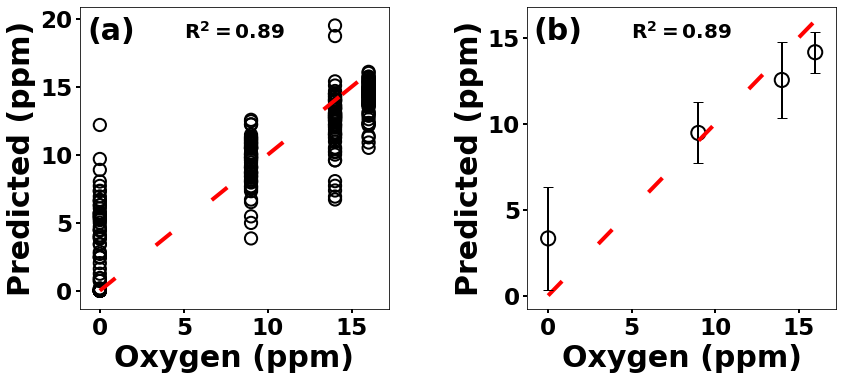

In [0]:
from sklearn.metrics import r2_score

test_result_dic = {0:[],9:[],14:[],16:[]}
predic_conc = [[],[],[],[]]
i = 0
for val in Y_test['O (ppm)']:
  test_result_dic[val*max_concentration].append(Y_pred_loaded[i]*max_concentration)
  i += 1
  
avg_dic = {}
for key in test_result_dic:
  dummy_list = []
  for i in range (0,len(test_result_dic[key])):
    dummy_list.append(sum(test_result_dic[key][i].tolist()))
  avg_dic.update({key:[statistics.mean(dummy_list),statistics.stdev(dummy_list)]})

average = []
stdev = []
for val in avg_dic.keys():
  average.append(avg_dic[val][0])
  stdev.append(avg_dic[val][1])

####################################################################################################################################################################################
fig, axes = plt.subplots(1,2,figsize=(14,6))
fig.subplots_adjust(left = 0.15,top=0.9, bottom=0.2,hspace = 0.45, wspace=0.45)
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')

axes[0].plot(Y_test*max_concentration, Y_test*max_concentration,  color='red',linewidth=4,
          linestyle='--',dashes=(5, 13))
axes[0].scatter(Y_test*max_concentration, Y_pred_loaded*max_concentration, s=150,linewidth=2,
            facecolors='none', edgecolors='black')

axes[0].set_xlabel('Oxygen (ppm)',fontsize=30,weight='bold')
axes[0].set_ylabel('Predicted (ppm)',fontsize=30,weight='bold')
axes[0].tick_params(which='both', length=4, width=2, labelsize=23,colors='black')

plt.setp(axes[0].get_xticklabels(), fontweight="bold")
plt.setp(axes[0].get_yticklabels(), fontweight="bold")

axes[1].plot(Y_test*max_concentration, Y_test*max_concentration,  color='red',linewidth=4,
          linestyle='--',dashes=(5, 13))
axes[1].scatter(concentration_org, average, s=200,linewidth=2,facecolors='none', edgecolors='black')

axes[1].set_xlabel('Oxygen (ppm)',fontsize=30,weight='bold')
axes[1].set_ylabel('Predicted (ppm)',fontsize=30,weight='bold')
axes[1].tick_params(which='both', length=4, width=2, labelsize=23,colors='black')
plotline, cap, barlinecols = axes[1].errorbar(concentration_org, average, yerr=stdev,fmt='o', 
                                           color='none',ecolor='black', elinewidth=2,capsize=5)

plt.setp(axes[1].get_xticklabels(), fontweight="bold")
plt.setp(axes[1].get_yticklabels(), fontweight="bold")

print('R2=',r2_score(concentration_org, average))
text(0.5, 0.92,'$\mathbf{R^2='+str(round(r2_score(concentration_org, average),2))+'}$',fontweight="bold",fontsize=20, ha='center', va='center', transform=axes[0].transAxes)
text(0.1, 0.92,'(a)',fontweight="bold",fontsize=30, ha='center', va='center', transform=axes[0].transAxes)
text(0.5, 0.92,'$\mathbf{R^2='+str(round(r2_score(concentration_org, average),2))+'}$',fontweight="bold",fontsize=20, ha='center', va='center', transform=axes[1].transAxes)
text(0.1, 0.92,'(b)',fontweight="bold",fontsize=30, ha='center', va='center', transform=axes[1].transAxes)

PATH = '/content/drive/My Drive/Data/Graphs/Final/CNN/'
# plt.savefig(PATH+"CNN_Prediction_avg_2.png",format='png', dpi=1200)
#plt.show()

**Importing 11ppm**

In [0]:
PATH = '/content/drive/My Drive/Data/'
conc_11 = pd.read_csv(PATH+'11ppm_combined.csv', delimiter=',', header=None)

del conc_11[0]
print('11 ppm shape', conc_11.shape)

conc_11_scaled = pd.DataFrame(data = min_max_sclaer.fit_transform(conc_11))
print('11 ppm scaled shape', conc_11_scaled.shape)

####################################################################################################################################################################################
X_test_11ppm = conc_11_scaled.T
input_X_test_11ppm = X_test_11ppm.values.reshape(-1,X_test_11ppm.shape[1],1)
Y_pred_loaded_11ppm = cnn_model.predict(input_X_test_11ppm, verbose=0)

11 ppm shape (1024, 279)
11 ppm scaled shape (1024, 279)


In [0]:
layer_outputs = [layer.output for layer in cnn_model.layers]
activation_model = tf.keras.models.Model(inputs=cnn_model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input
activations = activation_model.predict(input_X_test) ## activation[layer_No][No_sample][pixels][filter_No]
activation_11ppm = activation_model.predict(input_X_test_11ppm) ## activation[layer_No][No_sample][pixels][filter_No]

In [0]:
Y_test_vis = Y_test.copy()
Y_test_vis = Y_test_vis.reset_index(drop=True)

In [0]:
index_dic = {}
for val in concentration:
  index_dummy = []
  index_dummy = Y_test_vis.groupby(['O (ppm)']).get_group(val).index.tolist()
  index_dic.update({val:index_dummy})

distribution_dic = {}  ## dictionary = {concentration:{layer:{filter: A list containing convoluted all test spectra set}}}
filter_vis = {} ## dictionary = {concentration:{layer:{filter:avg}}}
tot_layer = 6
for conc in concentration:
  dummy_dic_1 = {}
  dummy_dic_4 = {}
  for layer_No in range(0,tot_layer):
    dummy_dic_2 = {}
    dummy_dic_3 = {}
    for f_val in range(0,activations[layer_No][0, :].shape[1]):
      dummy_list_1 = []
      for index_val in index_dic[conc]:
        dummy_list_1.append(activations[layer_No][index_val, :,f_val].tolist())
      dummy_dic_2.update({f_val:[float(sum(col))/len(col) for col in zip(*dummy_list_1)]})
      dummy_dic_3.update({f_val:dummy_list_1})
    dummy_dic_1.update({layer_No:dummy_dic_2})
    dummy_dic_4.update({layer_No:dummy_dic_3})
  filter_vis.update({conc:dummy_dic_1})
  distribution_dic.update({conc:dummy_dic_4})

dic_11ppm_filter_vis = {}  ## dictionary = {layer_No:{filter_No:avg}}
for layer in range(0,tot_layer):
  dummy_dic_11ppm = {}
  for f_val in range(0,activation_11ppm[layer_No][0, :].shape[1]):
    dummy_list_11ppm = []
    for i in range(0,activation_11ppm[0].shape[0]):
      dummy_list_11ppm.append(activation_11ppm[layer][i, :,f_val].tolist())
    dummy_dic_11ppm.update({f_val:[float(sum(col))/len(col) for col in zip(*dummy_list_11ppm)]})
  dic_11ppm_filter_vis.update({layer:dummy_dic_11ppm})

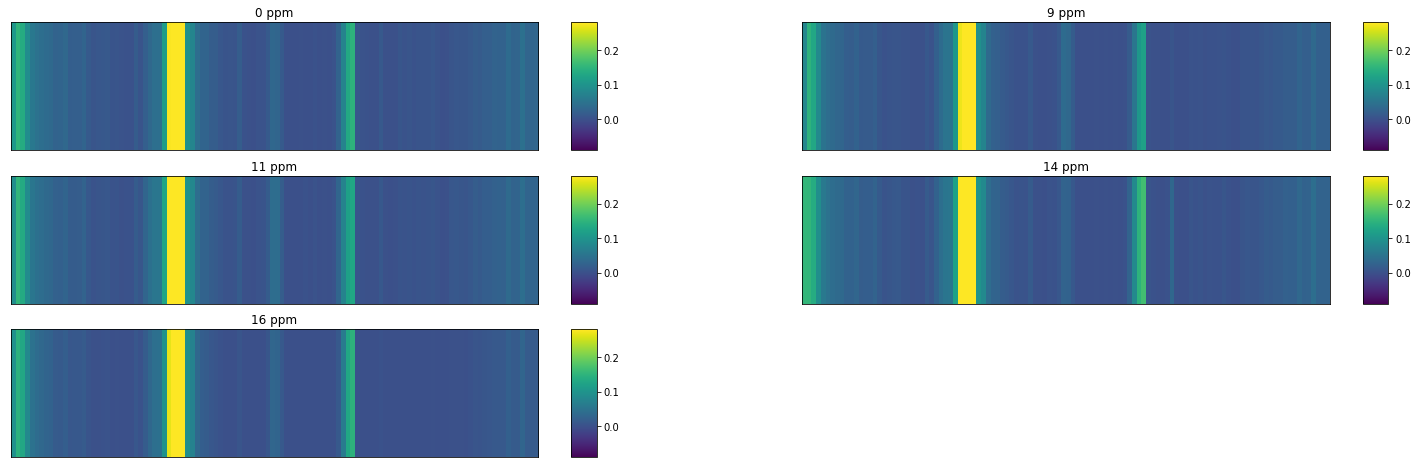

In [0]:
layer_No = 5
filter_No = 1
vmin_map = -0.09
vmax_map = 0.280

fig,ax = plt.subplots(3,2,figsize = (26,8))
ax = ax.ravel()

for i in range (0,len(concentration)-2):
  # input_map = [(a_i - b_i)/((b_i+1)) for a_i, b_i in zip(filter_vis[concentration[i]][layer_No][filter_No], filter_vis[concentration[0]][layer_No][filter_No])]
  # input_map = [abs((a_i - b_i)/((b_i+1))) for a_i, b_i in zip(filter_vis[concentration[i]][layer_No][filter_No], filter_vis[concentration[0]][layer_No][filter_No])]
  # input_map = [(a_i - b_i) for a_i, b_i in zip(filter_vis[concentration[i]][layer_No][filter_No], filter_vis[concentration[0]][layer_No][filter_No])]
  # input_map = [abs((a_i - b_i)) for a_i, b_i in zip(filter_vis[concentration[i]][layer_No][filter_No], filter_vis[concentration[0]][layer_No][filter_No])]
  input_map = filter_vis[concentration[i]][layer_No][filter_No]
  input_map = np.expand_dims(input_map, axis=0)
  pos = ax[i].imshow(input_map,cmap='viridis',aspect="auto",vmin=vmin_map, vmax=vmax_map)
  ax[i].set_title(str(int(concentration[i]*max_concentration))+' ppm')
  ax[i].set_xticks([])
  ax[i].set_yticks([])
  fig.colorbar(pos,aspect=5,ax=ax[i])

input_map_11ppm =  [(a_i - b_i)/(b_i+1) for a_i, b_i in zip(dic_11ppm_filter_vis[layer_No][filter_No], filter_vis[concentration[0]][layer_No][filter_No])]
input_map_11ppm =  [abs((a_i - b_i)/(b_i+1)) for a_i, b_i in zip(dic_11ppm_filter_vis[layer_No][filter_No], filter_vis[concentration[0]][layer_No][filter_No])]
input_map_11ppm =  [(a_i - b_i) for a_i, b_i in zip(dic_11ppm_filter_vis[layer_No][filter_No], filter_vis[concentration[0]][layer_No][filter_No])]
input_map_11ppm =  [abs((a_i - b_i)) for a_i, b_i in zip(dic_11ppm_filter_vis[layer_No][filter_No], filter_vis[concentration[0]][layer_No][filter_No])]
input_map_11ppm = dic_11ppm_filter_vis[layer_No][filter_No]
input_map_11ppm = np.expand_dims(input_map_11ppm, axis=0)
pos = ax[2].imshow(input_map_11ppm,cmap='viridis',aspect="auto",vmin=vmin_map, vmax=vmax_map)
ax[2].set_title('11 ppm')
ax[2].set_xticks([])
ax[2].set_yticks([])
fig.colorbar(pos,aspect=5,ax=ax[2])

for i in range (2,len(concentration)):
  # input_map = [(a_i - b_i)/((b_i+1)) for a_i, b_i in zip(filter_vis[concentration[i]][layer_No][filter_No], filter_vis[concentration[0]][layer_No][filter_No])]
  # input_map = [abs((a_i - b_i)/((b_i+1))) for a_i, b_i in zip(filter_vis[concentration[i]][layer_No][filter_No], filter_vis[concentration[0]][layer_No][filter_No])]
  # input_map = [(a_i - b_i) for a_i, b_i in zip(filter_vis[concentration[i]][layer_No][filter_No], filter_vis[concentration[0]][layer_No][filter_No])]
  # input_map = [abs((a_i - b_i)) for a_i, b_i in zip(filter_vis[concentration[i]][layer_No][filter_No], filter_vis[concentration[0]][layer_No][filter_No])]
  input_map = filter_vis[concentration[i]][layer_No][filter_No]
  input_map = np.expand_dims(input_map, axis=0)
  pos = ax[i+1].imshow(input_map,cmap='viridis',aspect="auto",vmin=vmin_map, vmax=vmax_map)
  ax[i+1].set_title(str(int(concentration[i]*max_concentration))+' ppm')
  ax[i+1].set_xticks([])
  ax[i+1].set_yticks([])
  fig.colorbar(pos,aspect=5,ax=ax[i+1])

fig.delaxes(ax.flat[-1])
plt.show()

# PATH = '/content/drive/My Drive/Data/Graphs/AutoEncoder/'
# plt.savefig(PATH+"Last_Filter_2.png",format='png', dpi=1000)

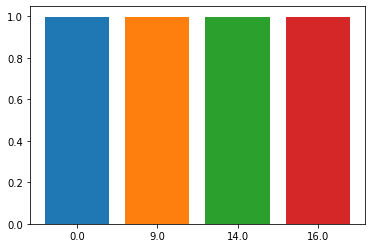

In [0]:
from sklearn.metrics.pairwise import cosine_similarity

for i in range (0,len(concentration)):
  input_map = filter_vis[concentration[i]][layer_No][filter_No]
  input_map = np.expand_dims(input_map, axis=0)
  plt.bar(str(concentration[i]*max_concentration),cosine_similarity(input_map, input_map_11ppm)[0][0])

In [0]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 1022, 5)           20        
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 340, 5)            0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 338, 3)            48        
_________________________________________________________________
dropout_4 (Dropout)          (None, 338, 3)            0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 336, 3)            30        
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 112, 3)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 336)              

# **Visualizing the layer in lower dimensions**:

The original input is in
\begin{align}
\vec{\mathbf{I}}&\in\mathbb{R^{1024}}
\end{align}

As the input flows through CNN filters, its dimension reduces:
\begin{align}
\vec{\mathbf{I_n}}&\in\mathbb{R^{n}}
\end{align}
where 
\begin{align}
n<1024
\end{align}
<br>
By plotting the heatmap, we can visualize the filters output. For sure, we can observe that the outputs are different for various concentrations. However, it is still difficult to detect systematic changes in the filters output. The systematic changes will assist us to understand how the CNN models looks at the spectra set and learn to predict. Moreover, it helps to detect the features that are seen by the CNN and used for prediction. Therefore, here we attempt to employ dimension reduction techniques such as PCA and autoencoder to map the filters outputs into lower dimensions (3D) for better understanding of how the network works.

In [0]:
layer_No = 5
filter_No = 1
autoencoder_train = np.array(distribution_dic[concentration[0]][layer_No][filter_No])
for i in range(1,len(concentration)):
  X_o = np.array(distribution_dic[concentration[i]][layer_No][filter_No])
  autoencoder_train = np.vstack((autoencoder_train,X_o))

autoencoder_train_11ppm = np.array(activation_11ppm[layer_No][:,:,filter_No])  

In [0]:
autoencoder_train.shape

(279, 112)

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)

encoder_dim_1 = 64
encoder_dim_2 = 16
encoder_dim_x = 12
encoder_dim_3 = 4
lambda_reg = 0.0

autoencoder = Sequential()
autoencoder.add(Dense(encoder_dim_1,  activation='elu', input_shape=(autoencoder_train.shape[1],)))
autoencoder.add(Dense(encoder_dim_2,  activation='elu',kernel_regularizer=keras.regularizers.l2(l=lambda_reg)))
# autoencoder.add(Dense(encoder_dim_x,  activation='elu',kernel_regularizer=keras.regularizers.l2(l=lambda_reg)))
autoencoder.add(Dense(encoder_dim_3,  activation='linear', name="bottleneck",kernel_regularizer=keras.regularizers.l2(l=lambda_reg)))
# autoencoder.add(Dense(encoder_dim_x,  activation='elu',kernel_regularizer=keras.regularizers.l2(l=lambda_reg)))
autoencoder.add(Dense(encoder_dim_2,  activation='elu',kernel_regularizer=keras.regularizers.l2(l=lambda_reg)))
autoencoder.add(Dense(encoder_dim_1,  activation='elu',kernel_regularizer=keras.regularizers.l2(l=lambda_reg)))
autoencoder.add(Dense(autoencoder_train.shape[1], activation='elu',kernel_regularizer=keras.regularizers.l2(l=lambda_reg)))

autoencoder.compile(loss='mean_squared_error', optimizer = Adam(lr=0.0001))

autoencoder.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 64)                7232      
_________________________________________________________________
dense_74 (Dense)             (None, 16)                1040      
_________________________________________________________________
bottleneck (Dense)           (None, 4)                 68        
_________________________________________________________________
dense_75 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_76 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_77 (Dense)             (None, 112)               7280      
Total params: 16,788
Trainable params: 16,788
Non-trainable params: 0
_________________________________________________

In [0]:
trained_model = autoencoder.fit(autoencoder_train, autoencoder_train, batch_size=32, epochs=5000, verbose=1,validation_split = 0.2,callbacks=[es])

Train on 223 samples, validate on 56 samples
Epoch 1/5000
223/223 [==============================] - 1s 5ms/step - loss: 0.0294 - val_loss: 0.0261
Epoch 2/5000
223/223 [==============================] - 0s 248us/step - loss: 0.0261 - val_loss: 0.0234
Epoch 3/5000
223/223 [==============================] - 0s 192us/step - loss: 0.0237 - val_loss: 0.0214
Epoch 4/5000
223/223 [==============================] - 0s 158us/step - loss: 0.0219 - val_loss: 0.0200
Epoch 5/5000
223/223 [==============================] - 0s 154us/step - loss: 0.0207 - val_loss: 0.0190
Epoch 6/5000
223/223 [==============================] - 0s 149us/step - loss: 0.0198 - val_loss: 0.0182
Epoch 7/5000
223/223 [==============================] - 0s 166us/step - loss: 0.0192 - val_loss: 0.0176
Epoch 8/5000
223/223 [==============================] - 0s 159us/step - loss: 0.0186 - val_loss: 0.0171
Epoch 9/5000
223/223 [==============================] - 0s 151us/step - loss: 0.0181 - val_loss: 0.0165
Epoch 10/5000
223/223

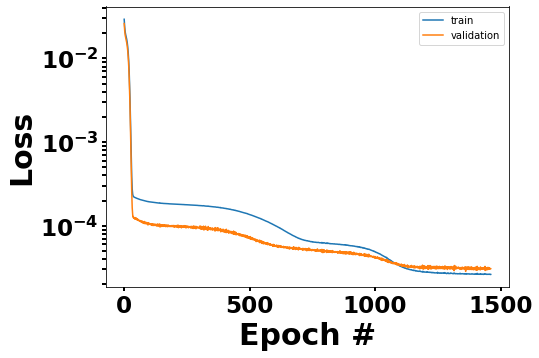

In [0]:
fig, axes = plt.subplots(figsize=(8,6))
fig.subplots_adjust(left = 0.2,top=0.9, bottom=0.25,hspace = 0.5, wspace=0.5)

plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.legend(['train', 'validation'], loc='upper right')
plt.xlabel('Epoch #',fontsize=30,weight='bold')
plt.ylabel('Loss',fontsize=30,weight='bold')
#plt.title('Model Loss',fontsize=35)
plt.setp(axes.get_xticklabels(), fontweight="bold")
plt.setp(axes.get_yticklabels(), fontweight="bold")
axes.set_yscale('log')
axes.tick_params(which='both', length=4, width=2, labelsize=23,colors='black')
# PATH = '/content/drive/My Drive/Data/Graphs/'
# plt.savefig(PATH+"Epoch.png",format='png', dpi=1200)

In [0]:
from keras.models import model_from_json
from keras.models import load_model

PATH = '/content/drive/My Drive/Data/Model and Weights/'
#  the keras model which is trained is defined as 'model' in this example
model_json = autoencoder.to_json()


with open(PATH+"AutoEncoder_CNN_SunEdison_0002.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
autoencoder.save_weights(PATH+"AutoEncoder_CNN_SunEdison_0002.h5")

In [0]:
PATH = '/content/drive/My Drive/Data/Model and Weights/'
json_file = open(PATH+'AutoEncoder_CNN_SunEdison_0001.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
autoencoder = tf.keras.models.model_from_json(loaded_model_json)

# load weights into new model
autoencoder.load_weights(PATH+"AutoEncoder_CNN_SunEdison_0001.h5")
print("Loaded model from disk")

autoencoder.save(PATH+'AutoEncoder_CNN_SunEdison_0001.hdf5')
autoencoder=tf.keras.models.load_model(PATH+'AutoEncoder_CNN_SunEdison_0001.hdf5')
autoencoder.compile(loss='mse', optimizer=opt,metrics=['mse'])

Loaded model from disk
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
# encoder = tf.keras.models.Model(autoencoder.input, autoencoder.get_layer('bottleneck').output)
encoder = Model(autoencoder.input, autoencoder.get_layer('bottleneck').output)
encoded_data = encoder.predict(autoencoder_train)
decoded_output = autoencoder.predict(autoencoder_train)

encoded_data_11ppm = encoder.predict(autoencoder_train_11ppm)
encoded_feature_dic = {0:encoded_data[0:70,:],1:encoded_data[70:131,:],2:encoded_data[131:203,:],3:encoded_data[203:279,:]}

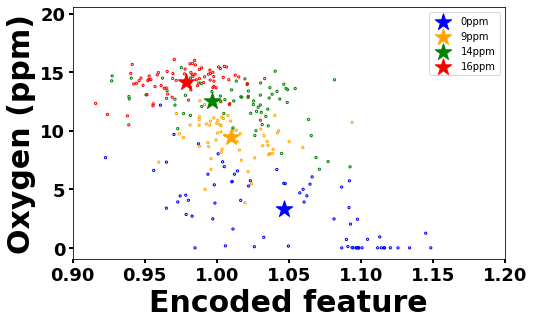

In [0]:
label_dic = {0:'0ppm',1:'9ppm',2:'14ppm',3:'16ppm'}
color_dic = {0:'blue',1:'orange',2:'green',3:'red'}
dummy_dic_convert = {0:0,1:9,2:14,3:16}
test_result_dummy = {0:[val[0] for val in test_result_dic[0]],1:[val[0] for val in test_result_dic[9]],2:[val[0] for val in test_result_dic[14]],3:[val[0] for val in test_result_dic[16]]}

fig,ax = plt.subplots(figsize=(8,5))
fig.subplots_adjust(left = 0.15,top=0.9, bottom=0.2,hspace = 0.45, wspace=0.45)
feature_k = 2
for i in range (0,4):
  # plt.scatter(encoded_feature_dic[i][:,0], encoded_feature_dic[i][:,1],label=label_dic[i])
  # plt.scatter(np.average(encoded_feature_dic[i][:,0]), np.average(encoded_feature_dic[i][:,2]),label=label_dic[i])
  ax.scatter(np.average(encoded_feature_dic[i][:,feature_k]), avg_dic[dummy_dic_convert[i]][0],label=label_dic[i],marker="*",s=300,color=color_dic[i])
  ax.scatter(encoded_feature_dic[i][:,feature_k],test_result_dummy[i],s=5,facecolors='none', edgecolors=color_dic[i])
  ax.tick_params(which='both', length=4, width=2, labelsize=18,colors='black')
  plt.setp(ax.get_xticklabels(), fontweight="bold")
  plt.setp(ax.get_yticklabels(), fontweight="bold")
  ax.set_ylabel('Oxygen (ppm)',fontsize=30,weight='bold')
  ax.set_xlabel('Encoded feature',fontsize=30,weight='bold')
plt.xlim(0.9,1.2)
plt.legend()
# plt.show()

PATH = '/content/drive/My Drive/Data/Graphs/AutoEncoder/'
plt.savefig(PATH+"Scatter_avg.png",format='png', dpi=1000)

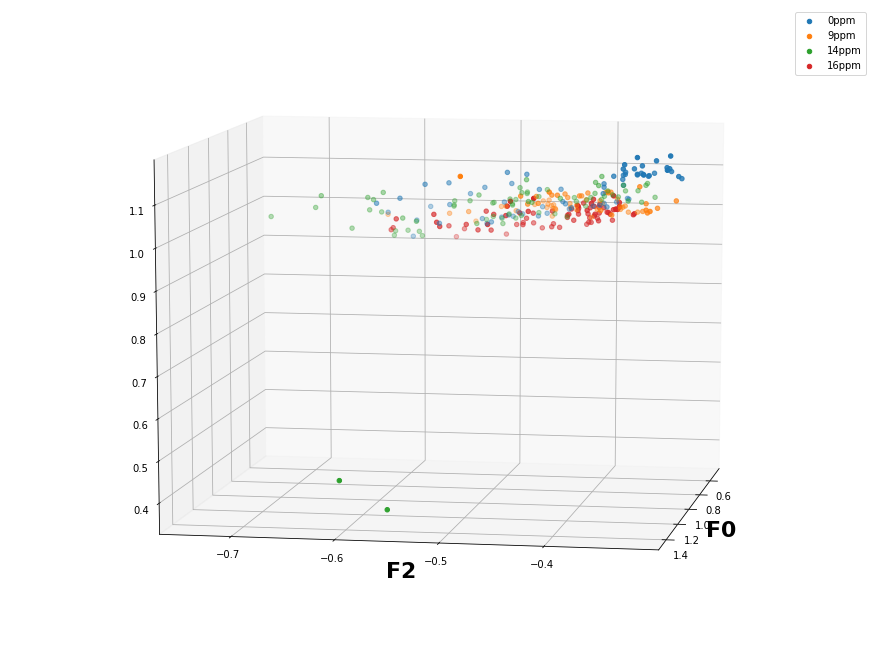

In [0]:
from mpl_toolkits.mplot3d import Axes3D

k_1 = 0
k_2 = 1
k_3 = 2

fig, ax = plt.subplots(figsize = (12,9))  
ax = Axes3D(fig)
ax.view_init(10, 10) ## (z angle,xy plane angle): r,theta cordinate system
# xmax = 0.4
for i in range (0,4):
  # ax.scatter(encoded_feature_dic[i][:,0], encoded_feature_dic[i][:,1],
  #            np.array(concentration_org[i]*encoded_feature_dic[i][:,0].shape[0]),label=label_dic[i])
  ax.scatter(encoded_feature_dic[i][:,0], encoded_feature_dic[i][:,1],encoded_feature_dic[i][:,2],label=label_dic[i]) 

ax.set_xlabel('F'+str(k_1),size=22,weight = 'bold')
ax.set_ylabel('F'+str(k_2),size=22,weight = 'bold')
ax.set_ylabel('F'+str(k_3),size=22,weight = 'bold')
# ax.set_zlabel('Concentration',size=22,weight ='bold')
plt.legend()
plt.show()

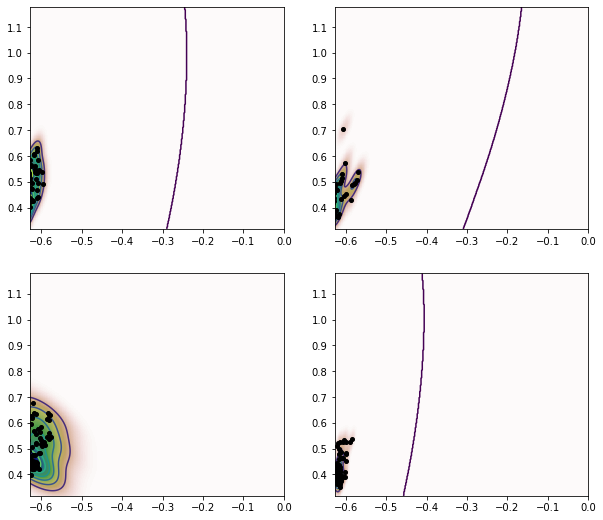

In [0]:
k_1 = 0
k_2 = 1
alpha_x = 0.1
alpha_y = 0.1

xmin = 0
xmax = 0
ymin = 0
ymax = 0

xmin = encoded_data[:,k_1].min()
xmin = encoded_data[:,k_1].max()
ymin = encoded_data[:,k_2].min()
ymax = encoded_data[:,k_2].max()

# X_o_11ppm = np.array(activation_11ppm[layer_No][:,:,filter_No])
# X_r_11ppm = pca.fit(X_o_11ppm).transform(X_o_11ppm)

# if xmin>X_r_11ppm[:,k_1].min():
#   xmin = X_r_11ppm[:,k_1].min()
# if xmax<X_r_11ppm[:,k_1].max():
#   xmax = X_r_11ppm[:,k_1].max()
# if ymin>X_r_11ppm[:,k_2].min():
#   ymin = X_r_11ppm[:,k_2].min()
# if ymax<X_r_11ppm[:,k_2].max():
#   ymax = X_r_11ppm[:,k_2].max()

xmin = xmin-abs(xmin*alpha_x)
xmax = xmax+abs(xmax*alpha_x)
ymin = ymin-abs(ymin*alpha_y)
ymax = ymax+abs(ymax*alpha_y)

def density_estimation(m1, m2):
    X, Y = np.mgrid[xmin:xmax:400j, ymin:ymax:400j]                                                     
    positions = np.vstack([X.ravel(), Y.ravel()])                                                       
    values = np.vstack([m1, m2])                                                                        
    kernel = stats.gaussian_kde(values)                                                                 
    Z = np.reshape(kernel(positions).T, X.shape)
    return X, Y, Z

fig, ax = plt.subplots(2,2,figsize = (10,9))  
# xmax = 1
# xmin = 1
# ymax = -8
ax = ax.ravel()
for i in encoded_feature_dic.keys():
  X, Y, Z = density_estimation(encoded_feature_dic[i][:,k_1], encoded_feature_dic[i][:,k_2])
  ax[i].imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin,xmax,ymin,ymax],aspect= 'auto')
  ax[i].contour(X, Y, Z,extent=[xmin,xmax,ymin,ymax])                                                                           
  ax[i].plot(encoded_feature_dic[i][:,k_1], encoded_feature_dic[i][:,k_2], 'k.', markersize=8)    
  ax[i].set_xlim([xmin,xmax])                                                                           
  ax[i].set_ylim([ymin,ymax])                                                           

# fig1, ax1 = plt.subplots(figsize = (6,4))  
# X, Y, Z = density_estimation(encoded_data_11ppm[:,k_1], encoded_data_11ppm[:,k_2])
# ax1.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin,xmax,ymin,ymax])
# ax1.contour(X, Y, Z,extent=[xmin,xmax,ymin,ymax])                                                                           
# ax1.plot(encoded_data_11ppm[:,k_1], encoded_data_11ppm[:,k_2], 'k.', markersize=8)    
# ax1.set_xlim([xmin,xmax])                                                                           
# ax1.set_ylim([ymin,ymax])  
plt.show()    

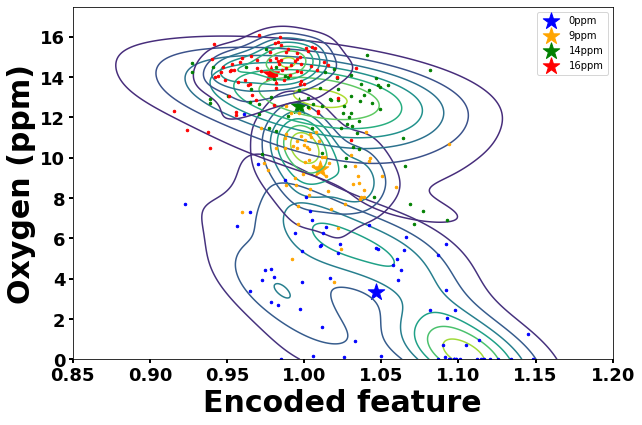

In [0]:
k_1 = 2

alpha_x = 0.9
alpha_y = 0.1

xmin = 0
xmax = 0
ymin = 0
ymax = 0

xmin = encoded_data[:,k_1].min()
xmax = encoded_data[:,k_1].max()
# ymin = encoded_data[:,k_2].min()
# ymax = encoded_data[:,k_2].max()
for i in range (0,4):
  ymin_temp = min(test_result_dummy[i])
  ymax_temp = max(test_result_dummy[i])
  if ymin_temp < ymin:
    ymin = ymin_temp
  if ymax_temp > ymax:
    ymax = ymax_temp
# ymin = 0
# ymax = 20

# X_o_11ppm = np.array(activation_11ppm[layer_No][:,:,filter_No])
# X_r_11ppm = pca.fit(X_o_11ppm).transform(X_o_11ppm)

# if xmin>X_r_11ppm[:,k_1].min():
#   xmin = X_r_11ppm[:,k_1].min()
# if xmax<X_r_11ppm[:,k_1].max():
#   xmax = X_r_11ppm[:,k_1].max()
# if ymin>X_r_11ppm[:,k_2].min():
#   ymin = X_r_11ppm[:,k_2].min()
# if ymax<X_r_11ppm[:,k_2].max():
#   ymax = X_r_11ppm[:,k_2].max()

xmin = xmin-abs(xmin*alpha_x)
xmax = xmax+abs(xmax*alpha_x)
ymin = ymin-abs(ymin*alpha_y)
ymax = ymax+abs(ymax*alpha_y)

def density_estimation(m1, m2):
    X, Y = np.mgrid[xmin:xmax:400j, ymin:ymax:400j]                                                     
    positions = np.vstack([X.ravel(), Y.ravel()])                                                       
    values = np.vstack([m1, m2])                                                                        
    kernel = stats.gaussian_kde(values)                                                                 
    Z = np.reshape(kernel(positions).T, X.shape)
    return X, Y, Z

fig, ax = plt.subplots(figsize = (10,7))  
fig.subplots_adjust(left = 0.15,top=0.9, bottom=0.2,hspace = 0.45, wspace=0.45)
xmax = 1.2
xmin = 0.85
ymax = 17.5

Z_list = []
for i in encoded_feature_dic.keys():
  X, Y, Z = density_estimation(encoded_feature_dic[i][:,k_1], test_result_dummy[i])
  Z_list.append(Z)
  # ax.imshow(np.rot90(Z_list[i]), cmap=plt.cm.gist_earth_r,extent=[xmin,xmax,ymin,ymax],aspect= 'auto')
  ax.contour(X, Y, Z,extent=[xmin,xmax,ymin,ymax])                                                                           
  ax.plot(encoded_feature_dic[i][:,k_1], test_result_dummy[i], 'k.', markersize=5,color=color_dic[i])  
  ax.scatter(np.average(encoded_feature_dic[i][:,k_1]), avg_dic[dummy_dic_convert[i]][0],label=label_dic[i],
             marker="*",s=300,color=color_dic[i])  
  # ax.scatter(np.average(encoded_feature_dic[i][:,0]), statistics.median(test_result_dummy[i]),
  # label=label_dic[i],marker="*",s=300,color=color_dic[i])  
  ax.set_xlim([xmin,xmax])                                                                           
  ax.set_ylim([ymin,ymax])     
  ax.tick_params(which='both', length=4, width=2, labelsize=18,colors='black')
  plt.setp(ax.get_xticklabels(), fontweight="bold")
  plt.setp(ax.get_yticklabels(), fontweight="bold")
  ax.set_ylabel('Oxygen (ppm)',fontsize=30,weight='bold')
  ax.set_xlabel('Encoded feature',fontsize=30,weight='bold')                                                      

# fig1, ax1 = plt.subplots(figsize = (6,4))  
# X, Y, Z = density_estimation(encoded_data_11ppm[:,k_1], encoded_data_11ppm[:,k_2])
# ax1.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin,xmax,ymin,ymax])
# ax1.contour(X, Y, Z,extent=[xmin,xmax,ymin,ymax])                                                                           
# ax1.plot(encoded_data_11ppm[:,k_1], encoded_data_11ppm[:,k_2], 'k.', markersize=8)    
# ax1.set_xlim([xmin,xmax])                                                                           
# ax1.set_ylim([ymin,ymax])  
plt.legend()
# plt.show()    

PATH = '/content/drive/My Drive/Data/Graphs/AutoEncoder/'
plt.savefig(PATH+"Scatter_avg_prob.png",format='png', dpi=1000)

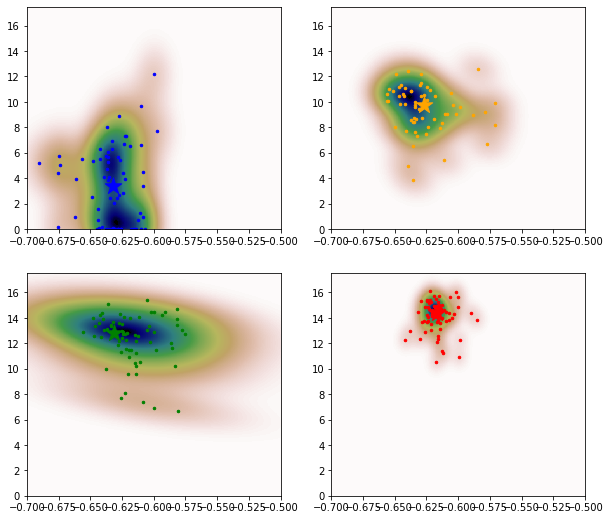

In [0]:
fig, ax = plt.subplots(2,2,figsize = (10,9))  
ax = ax.ravel()
for i in range (0,4):
  ax[i].plot(encoded_feature_dic[i][:,k_1], test_result_dummy[i], 'k.', markersize=5,color=color_dic[i])  
  ax[i].imshow(np.rot90(Z_list[i]), cmap=plt.cm.gist_earth_r,extent=[xmin,xmax,ymin,ymax],aspect= 'auto')
  ax[i].scatter(np.average(encoded_feature_dic[i][:,0]), statistics.median(test_result_dummy[i]),label=label_dic[i],marker="*",s=300,color=color_dic[i])  
  ax[i].set_xlim([-0.7,-0.5])                                                                           
  ax[i].set_ylim([0,17.5])
plt.show()